In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, UnivariateSpline
from datetime import date

from openalea.archicrop.stics_io import read_sti_file

In [2]:
# Data points
stics_output_file = 'mod_s02NT18SorgV2D1.sti'
sowing_density = 6
inter_row = 0.4
stics_output_data = read_sti_file(stics_output_file, sowing_density)
time = [value["Thermal time"] for value in stics_output_data.values()]
LA_stics = [value["Plant leaf area"] for value in stics_output_data.values()]
height_stics = [value["Plant height"] for value in stics_output_data.values()]
par_stics = [value["Absorbed PAR"] for value in stics_output_data.values()]
height_potential_plant = max(height_stics)

x = time
y = LA_stics

In [3]:
# Create the cubic spline interpolator
cs = UnivariateSpline(x, y, k=3, s=1000)

# Compute the first derivative
cs_derivative = cs.derivative()

# Evaluate the derivative at specific points
x_dense = np.arange(min(x), max(x), 1)  # Fine grid for plotting
y_dense = cs(x_dense)                       # Interpolated values
dy_dense = cs_derivative(x_dense)           # Derivative values

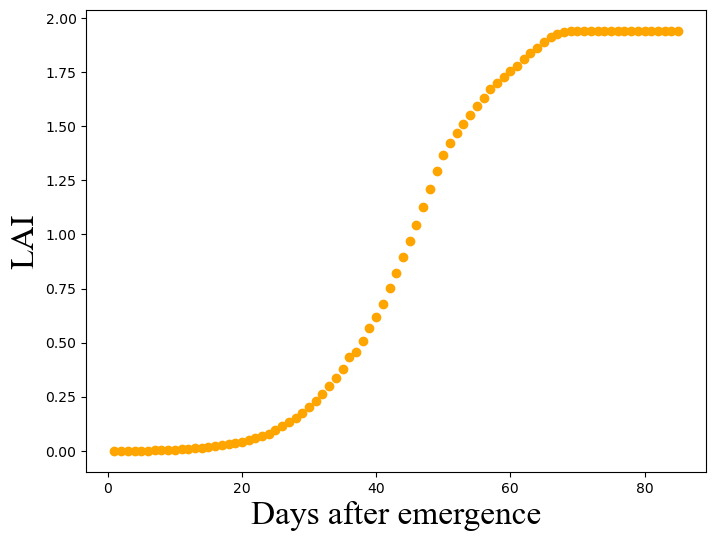

In [6]:
# Create the plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(8, 6))

cf_cm = 100
sowing_density = 6  # plants per m²
lai = [la*sowing_density/cf_cm**2 for la in LA_stics]

# Primary y-axis for the cubic spline (y)
ax1.scatter(list(stics_output_data.keys())[:-35], lai[:-35], color='orange')  # Data points
ax1.set_xlabel('Days after emergence', fontsize=24, fontname="Times New Roman")
ax1.set_ylabel('LAI', fontsize=24, fontname="Times New Roman")

# Save figure
today_str = date.today().strftime("%Y-%m-%d")
os.makedirs(f"D:/PhD_Oriane/simulations_ArchiCrop/{today_str}", exist_ok=True)  # noqa: PTH103
plt.savefig(f"D:/PhD_Oriane/simulations_ArchiCrop/{today_str}/plot_crop_LAI.png")


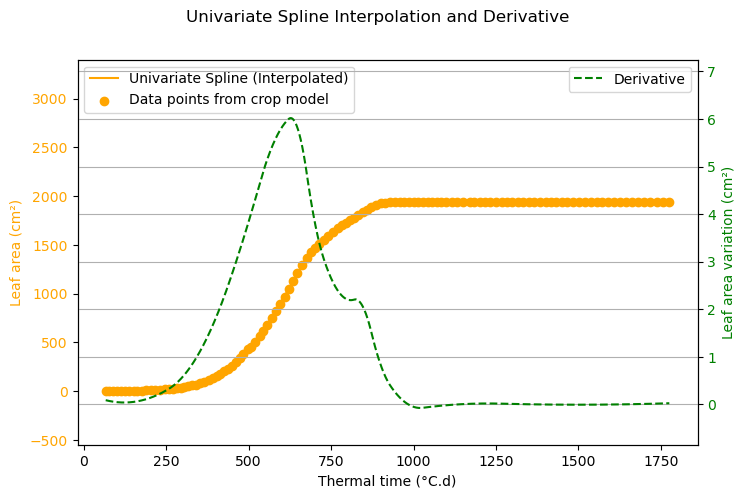

In [ ]:
# Create the plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(8, 5))

# Primary y-axis for the cubic spline (y)
ax1.plot(x_dense, y_dense, label='Univariate Spline (Interpolated)', color='orange')
ax1.scatter(x, y, color='orange', label='Data points from crop model')  # Data points
ax1.set_xlabel('Thermal time (°C.d)')
ax1.set_ylabel('Leaf area (cm²)', color='orange')
ax1.set_ylim(-550, 3400)
ax1.tick_params(axis='y', labelcolor='orange')

# Secondary y-axis for the derivative (dy)
ax2 = ax1.twinx()
ax2.plot(x_dense, dy_dense, label='Derivative', color='green', linestyle='--')
ax2.set_ylabel('Leaf area variation (cm²)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Align zero levels of both axes
y_min, y_max = ax1.get_ylim()
dy_min, dy_max = min(dy_dense), max(dy_dense)

# Compute scaling and shift to align zeros
primary_range = y_max - y_min
secondary_range = dy_max - dy_min
dy_offset = (y_min * secondary_range / primary_range) - dy_min
dy_scale = primary_range / secondary_range

# Adjust secondary y-axis limits
ax2.set_ylim(dy_min + dy_offset, dy_max + dy_offset + 2)

# Add legends and grid
fig.suptitle('Univariate Spline Interpolation and Derivative')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid()
plt.show()

# TO DO: automatiser reperage points d'inflexion courbe LAI:
- plateau a 0 --> debut croissance
- fin de croissance --> plateau au max
- plateau au max --> senescence

--> interpoler par morceaux

# Read STICS input tec file

In [ ]:
import xml.etree.ElementTree as ET

# Parse the XML file
tree = ET.parse("sorgho_tec.xml")
root = tree.getroot()

# Retrieve the 'densitesem' parameter
densitesem = root.find(".//param[@nom='densitesem']").text

# Retrieve the 'interrang' parameter (nested under option -> choix)
interrang = root.find(".//choix[@code='1']/param[@nom='interrang']").text

# Print the values
print(f"densitesem: {densitesem}")
print(f"interrang: {interrang}")

densitesem: 10.00000
interrang: 0.00000
